<a href="https://colab.research.google.com/github/AhmedGamal-Gemy/Digital-Egypt-Pioneers-Initiative-DEPI-/blob/main/Deep%20learning/Classification/handwritten_digits_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from os import name
import cv2
import numpy as np
from keras.preprocessing import image

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

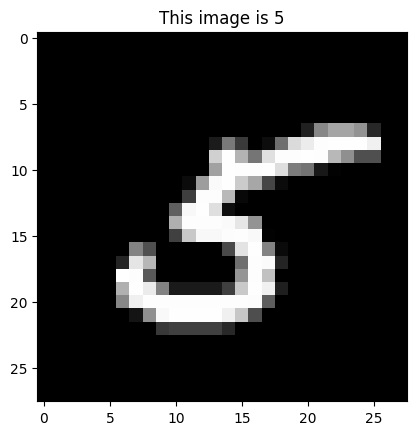

In [ ]:
# just to display example of the data

image_index = 175

plt.imshow(train_images[image_index],cmap = 'gray')
plt.title('This image is {}'.format( train_labels[image_index] )  )
plt.show()

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# Making sure the shapes are correct

print("The original shape : {}".format(train_images.shape) )

# reshaping

features_num = train_images.shape[1] * train_images.shape[2]

train_images = train_images.reshape(-1,features_num).astype("float32") / 255

test_images = test_images.reshape(-1,features_num).astype("float32") / 255


print("The shape now : {}".format( test_images.shape ) )


The original shape : (60000, 28, 28)
The shape now : (10000, 784)


In [ ]:
# define the structure of the neural network


# create the input layer contains features number of nodes
inputs = keras.Input( shape = ( features_num, ) )

# create a new layer and connect it with the previous layer inputs
first_layer = layers.Dense(512, activation = "relu", name = "First_layer") (inputs)

# create a new layer and connect it with the previous layer first layer
second_layer = layers.Dense(256, activation = "relu", name = "Second_layer") (first_layer)

third_layer = layers.Dense(128, activation = "relu", name = "Third_layer") (second_layer)

# create the output and connect it with the previous layer second layer
outputs = layers.Dense(10, activation = 'softmax', name = "Output_layer") ( third_layer )

model = keras.Model(inputs = inputs , outputs = outputs)



In [ ]:
model.compile(

    loss = keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]

)

In [ ]:
model.fit(train_images,train_labels, batch_size = 64, epochs = 10, verbose = 2)

Epoch 1/10
938/938 - 14s - 15ms/step - accuracy: 0.9387 - loss: 0.2040
Epoch 2/10
938/938 - 20s - 22ms/step - accuracy: 0.9740 - loss: 0.0834
Epoch 3/10
938/938 - 20s - 22ms/step - accuracy: 0.9814 - loss: 0.0567
Epoch 4/10
938/938 - 11s - 12ms/step - accuracy: 0.9866 - loss: 0.0428
Epoch 5/10
938/938 - 22s - 23ms/step - accuracy: 0.9894 - loss: 0.0344
Epoch 6/10
938/938 - 21s - 22ms/step - accuracy: 0.9902 - loss: 0.0300
Epoch 7/10
938/938 - 20s - 21ms/step - accuracy: 0.9921 - loss: 0.0237
Epoch 8/10
938/938 - 12s - 12ms/step - accuracy: 0.9933 - loss: 0.0214
Epoch 9/10
938/938 - 11s - 12ms/step - accuracy: 0.9941 - loss: 0.0179
Epoch 10/10
938/938 - 21s - 23ms/step - accuracy: 0.9945 - loss: 0.0176


In [ ]:
model.evaluate(test_images,test_labels, batch_size = 64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9767 - loss: 0.0891


[0.07095466554164886, 0.9818000197410583]

In [ ]:
import os
# Check if DISPLAY environment variable is set (indicating a graphical environment)
if os.environ.get('DISPLAY'):
    # Use Tkinter for file selection if DISPLAY is set
    import tkinter as tk
    from tkinter import filedialog

    root = tk.Tk()
    root.withdraw()

    file_path = filedialog.askopenfilename()

    if file_path:
        print(f"Selected file: {file_path}")
        file = file_path
    else:
        print("No file selected.")
else:
    # Use manual file path input if DISPLAY is not set
    file = input("Enter the path to your image file: ")


Enter the path to your image file: /content/Two.jpg


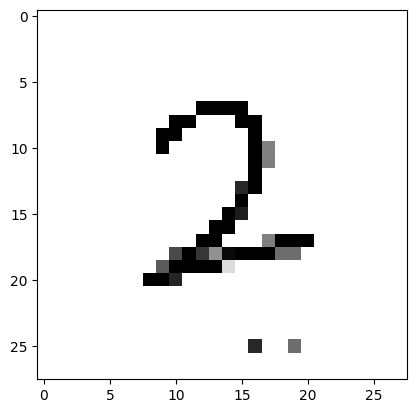

In [ ]:
# Take an digit image from the user then resize it to the needed size

# Load sample image
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

# Preview sample image
plt.imshow(test_image, cmap='gray')

# Apply simple thresholding
_, img_thresholded = cv2.threshold(test_image, 150, 255, cv2.THRESH_BINARY)
# plt.imshow(img_thresholded)

# Format Image
img_resized = cv2.resize(img_thresholded, (28, 28))

# Preview reformatted image
plt.imshow(img_resized,cmap='gray')

#  Normalize pixel values to [0, 1]
img_resized = img_resized.astype("float32") / 255.0

# Flatten the image to match the input shape of your model
img_array = img_resized.reshape(1, -1)



In [ ]:
# Give the model a photo i write for a digit and test it personally

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions)

print(f"The model predicts the digit as : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The model predicts the digit as : 7
